*Dataset construido por:*

*Gabriel de Carvalho Vasconcelos gcv@cesar.school*

*Eduardo Vaz de Oliveira Gerab evog@cesar.school*

# **Iris Dataset**

## Importing & Visualization

In [ ]:
from sklearn import datasets
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.preprocessing import RobustScaler
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_samples
from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import AgglomerativeClustering

In [ ]:
iris = datasets.load_iris()
irisdf = pd.DataFrame(iris['data'], columns=iris['feature_names'])

irisdf['Espécies'] = iris.target
iristarget = irisdf[['petal length (cm)', 'petal width (cm)', 'Espécies']]

irisdf = irisdf.drop(columns=['Espécies'])

In [ ]:
irisdf.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
irisdf.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
irisdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


## **ScatterPlot da Dispersão das Características**

Foi feito um scatterplot das características das plantas para uma melhor visualizacao da distribuição delas.

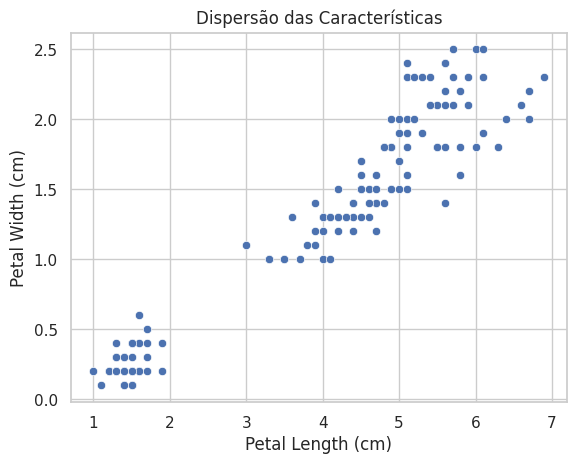

In [ ]:
sns.scatterplot(data=irisdf, x='petal length (cm)', y='petal width (cm)')
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.title('Dispersão das Características')
plt.show()

## **Padronização dos Dados**

Para a padronização dos dados, decidimos utilizar o RobustScaler, visto é que um Scaler de padronização pouco afetado pelos outliers, pela visualização da dispersão não é tão perceptível assim a visualização desses outliers, porém, para a utilização do K-means, é necessário visto que pode afetar no desempenho do modelo de aprendizado.

In [ ]:
scaler = RobustScaler()
iris_std = irisdf[['petal length (cm)', 'petal width (cm)']]
petals_std_np = scaler.fit_transform(iris_std)
petals_std = pd.DataFrame(data=petals_std_np, columns=['petal length (cm)', 'petal width (cm)'])

In [ ]:
iris_std.head()

,petal length (cm),petal width (cm)
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2


## **Dispersão pós-padronização dos Dados**

Vamos plotar o gráfico de ScatterPlot novamente, porém, agora com a padronização dos dados.

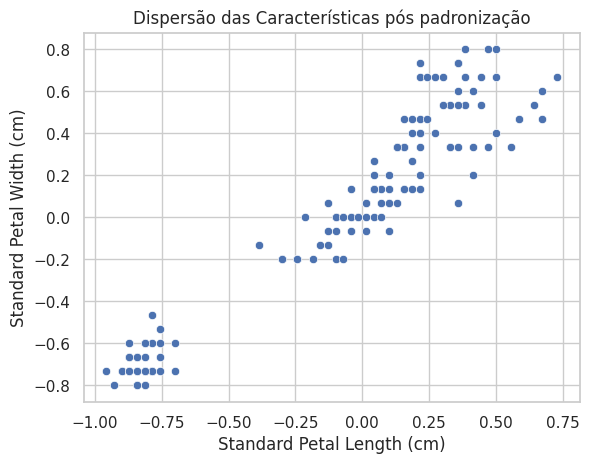

In [ ]:
sns.scatterplot(data=petals_std, x='petal length (cm)', y='petal width (cm)')
plt.xlabel('Standard Petal Length (cm)')
plt.ylabel('Standard Petal Width (cm)')
plt.title('Dispersão das Características pós padronização')
plt.show()

## **K-means**

### Treinamento do Modelo

Vamos utilizar o K-means para treinar o modelo em nosso dataset com os valores de K num intervalo de 1 - 8.

In [ ]:
X = petals_std[['petal length (cm)', 'petal width (cm)']]
k_values = range(1, 8)
kmeans_models = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)  # Defina n_init para suprimir o aviso
    kmeans.fit(X)
    kmeans_models.append(kmeans)

#### Gráfico de Dispersão

Depois de treinar o modelo, plotamos o grafico de dispersão com os clusters e seus respectivos centroides.

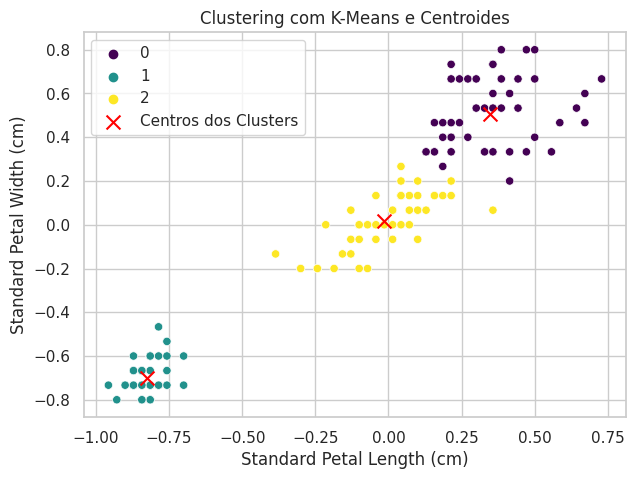

In [ ]:
petal_length_std = petals_std['petal length (cm)']
petal_width_std = petals_std['petal width (cm)']

cluster_labels = kmeans_models[2].labels_
cluster_centers = kmeans_models[2].cluster_centers_

plt.figure(figsize=(7, 5))
sns.scatterplot(x=petal_length_std, y=petal_width_std, hue=cluster_labels, palette='viridis')
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], c='red', marker='x', s=100, label='Centros dos Clusters')
plt.xlabel('Standard Petal Length (cm)')
plt.ylabel('Standard Petal Width (cm)')
plt.title('Clustering com K-Means e Centroides')
plt.legend(loc='upper left')
plt.show()

### Encontrando o Melhor Valor de K

Para descobrirmos o melhor valor de K, é necessário utilizar um método chamado Elbow Method (método do cotovelo), onde o melhor valor de K é definido pela curvatura do gráfico formando o cotovelo, e também podemos utilizar o Silhouette Score.

#### Elbow Method

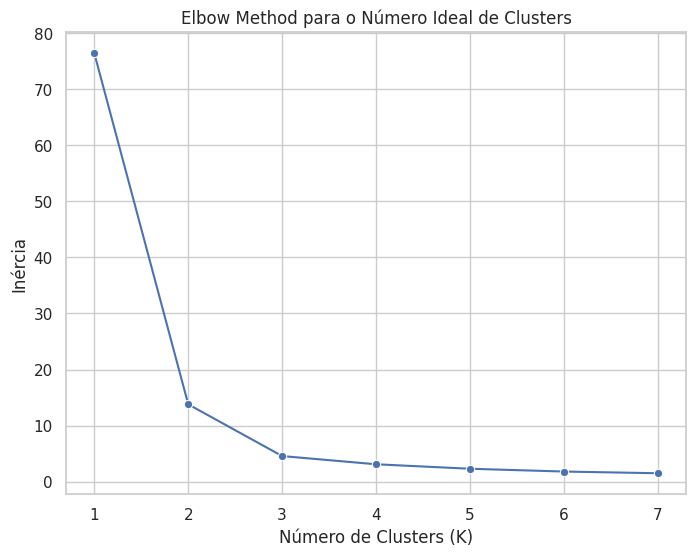

In [ ]:
inertia_values = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X)
    inertia = kmeans.inertia_
    inertia_values.append(inertia)

plt.figure(figsize=(8, 6))
sns.lineplot(x=k_values, y=inertia_values, marker='o')
plt.title('Elbow Method para o Número Ideal de Clusters')
plt.xlabel('Número de Clusters (K)')
plt.ylabel('Inércia')
plt.show()

Com o grafico do elbow method plotado, pode ser percebido que o melhor valor de k é 3. A seguir, será plotado o grafico do silhoutte score, outro metodo de descobrir o melhor valor de k.

#### Silhouette Score

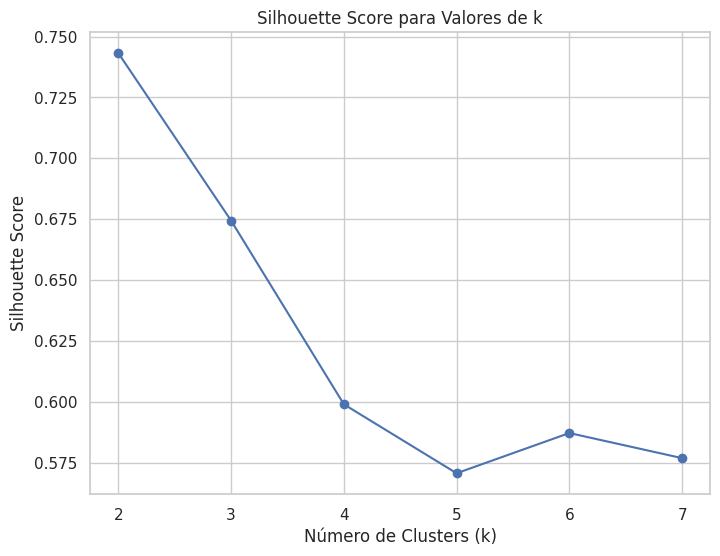

In [ ]:
k_values = range(2, 8)
silhouette_scores = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, n_init=10)
    cluster_labels = kmeans.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels)
    silhouette_scores.append(silhouette_avg)

plt.figure(figsize=(8, 6))
plt.plot(k_values, silhouette_scores, marker='o', linestyle='-')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score para Valores de k')
plt.grid(True)
plt.show()

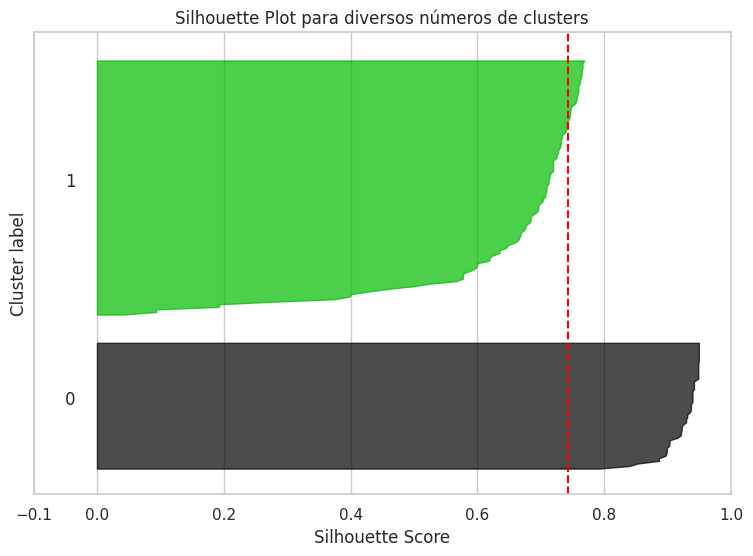

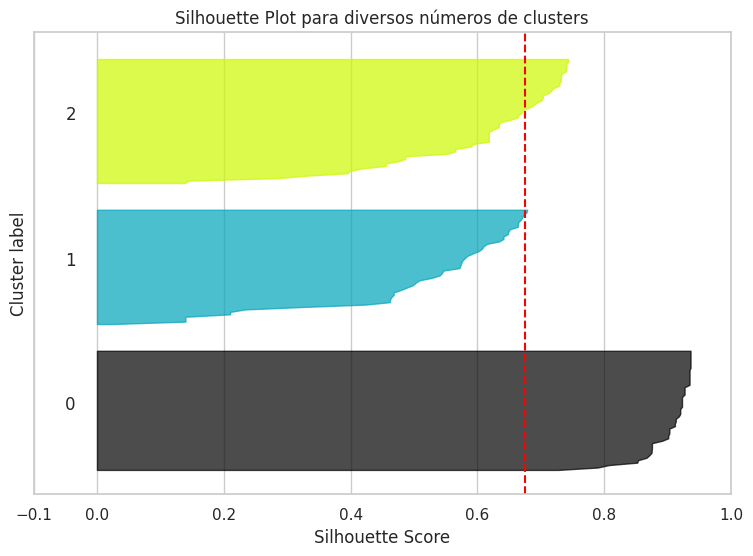

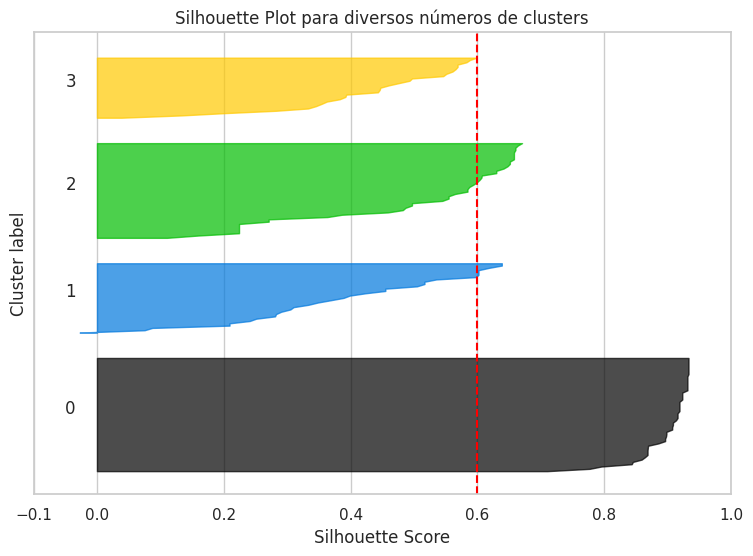

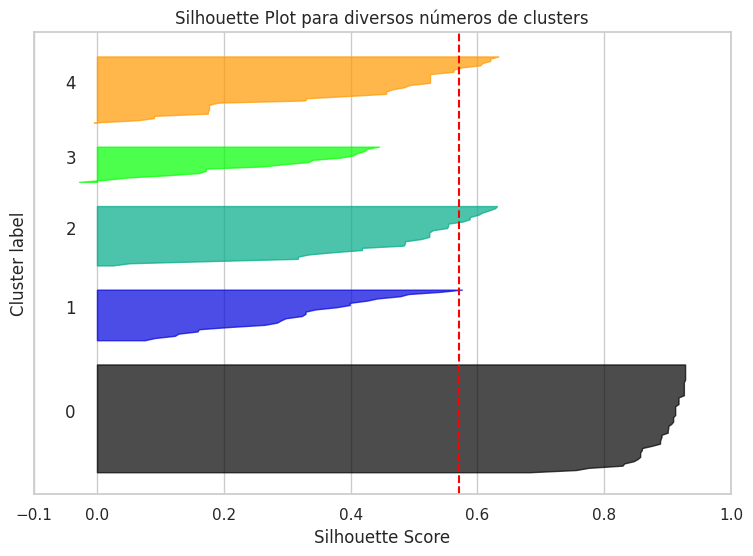

In [ ]:
range_n_clusters = [2, 3, 4, 5]
last_silhouette_plot = None

for n_clusters in range_n_clusters:
    fig, ax1 = plt.subplots(1, 1)
    fig.set_size_inches(9, 6)
    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])
    clusterer = KMeans(n_clusters=n_clusters, n_init="auto", random_state=10)
    cluster_labels = clusterer.fit_predict(X)
    silhouette_avg = silhouette_scores[n_clusters - 2]
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        y_lower = y_upper + 10

    ax1.set_title("Silhouette Plot para diversos números de clusters")
    ax1.set_xlabel("Silhouette Score")
    ax1.set_ylabel("Cluster label")
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
    ax1.set_yticks([])
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
    last_silhouette_plot = plt

last_silhouette_plot.show()

De acordo com o silhouette score, o melhor valor de k é 2, isto é, tivemos o maior valor do silhouette score utilizando-se de 2 clusters. Abaixo, será feita a comparação dos dois valores obtidos pelos métodos anteriores, reagrupando os clusters com os valores de 2 e 3.

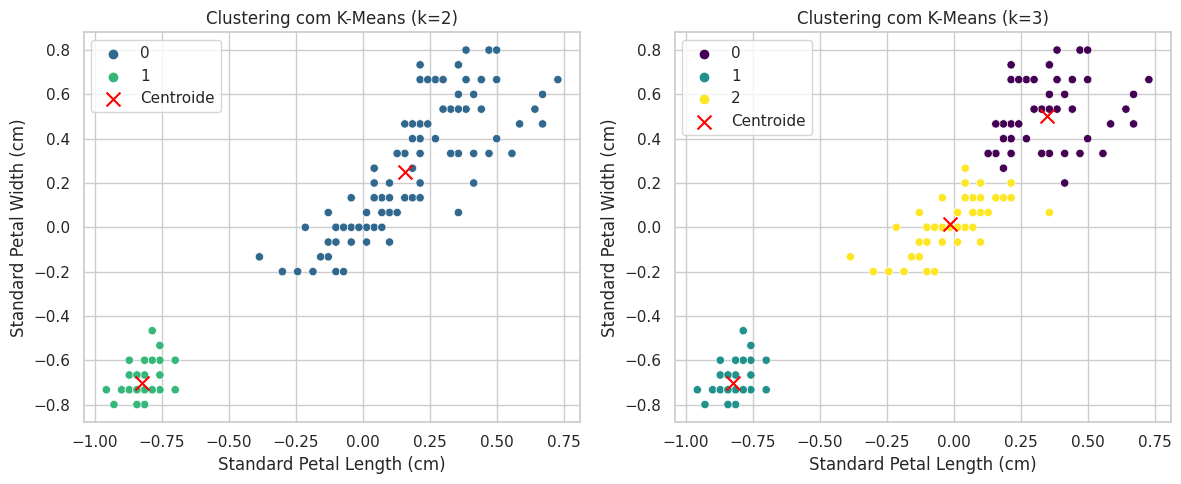

In [ ]:
plt.figure(figsize=(12, 5))

indices_a_plotar = [1, 2]

for i, idx in enumerate(indices_a_plotar):
    kmeans_model = kmeans_models[idx]
    k = kmeans_model.n_clusters
    petal_length_std = petals_std['petal length (cm)']
    petal_width_std = petals_std['petal width (cm)']

    cluster_labels = kmeans_model.labels_
    cluster_centers = kmeans_model.cluster_centers_

    plt.subplot(1, len(indices_a_plotar), i + 1)

    sns.scatterplot(x=petal_length_std, y=petal_width_std, hue=cluster_labels, palette='viridis')
    plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], c='red', marker='x', s=100, label='Centroide')
    plt.xlabel('Standard Petal Length (cm)')
    plt.ylabel('Standard Petal Width (cm)')
    plt.title(f'Clustering com K-Means (k={k})')
    plt.legend(loc='upper left')

plt.tight_layout()
plt.show()

Com os resultados obtidos, comparamos o melhor valor de k obtido com o *Silhouette Score* (2) com o valor de k obtido com o *Elbow Method* (3). Apesar de neste treinamento não termos os valores de y (saídas), com base nos dados reais, existem 3 classes bem definidas, que sao Setosa, Versicolor e Virginica. Logo, mesmo com os modelos apontando o "melhor k" como 2, iremos assumir o melhor k como 3.

## **Análise com as espécies reais dos dados**

Ao normalizarmos o Dataset com o target, plotamos o Scatter Plot para uma melhor visualização da análise dos agrupamentos.

In [ ]:
X = iristarget[['petal length (cm)', 'petal width (cm)']]
y = iristarget['Espécies']

scaler = RobustScaler()
X_scaled = scaler.fit_transform(X)

iristarget_std = pd.DataFrame(data=X_scaled, columns=['petal_length', 'petal_width'])
iristarget_std['Espécies'] = y

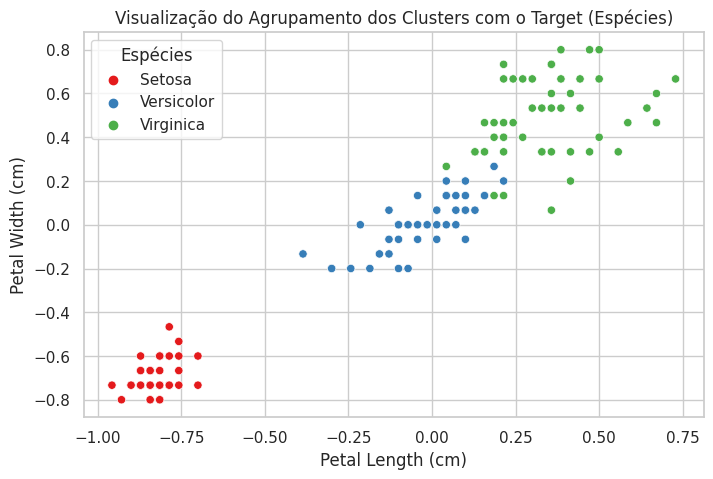

In [ ]:
target_mapping = {0: "Setosa", 1: "Versicolor", 2: "Virginica"}
iristarget_std['Espécies'] = iristarget_std['Espécies'].map(target_mapping)

plt.figure(figsize=(8, 5))
sns.scatterplot(x="petal_length", y="petal_width", hue="Espécies", data=iristarget_std, palette="Set1")
plt.title("Visualização do Agrupamento dos Clusters com o Target (Espécies)")
plt.xlabel("Petal Length (cm)")
plt.ylabel("Petal Width (cm)")
plt.show()

Como pode ser observado no gráfico acima, o modelo está clusterizando as três especies de íris. O modelo consegue agrupar claramente as espécies do modelo setosa, porem se confunde ao agrupar versicolor e virginica, ja que existe um overlap das duas espécies. Isso provavelmente acontece porque estao sendo comparadas caracteristicas fisicas das flroes, como comprimento e largura. Como as flores da setosa são menores e mais largas, fica mais facil de classificá-las.

### Comparação Treinamento x Real

Aogra, iremos comparar os dados obtidos através do nosso modelo com os dados reais.

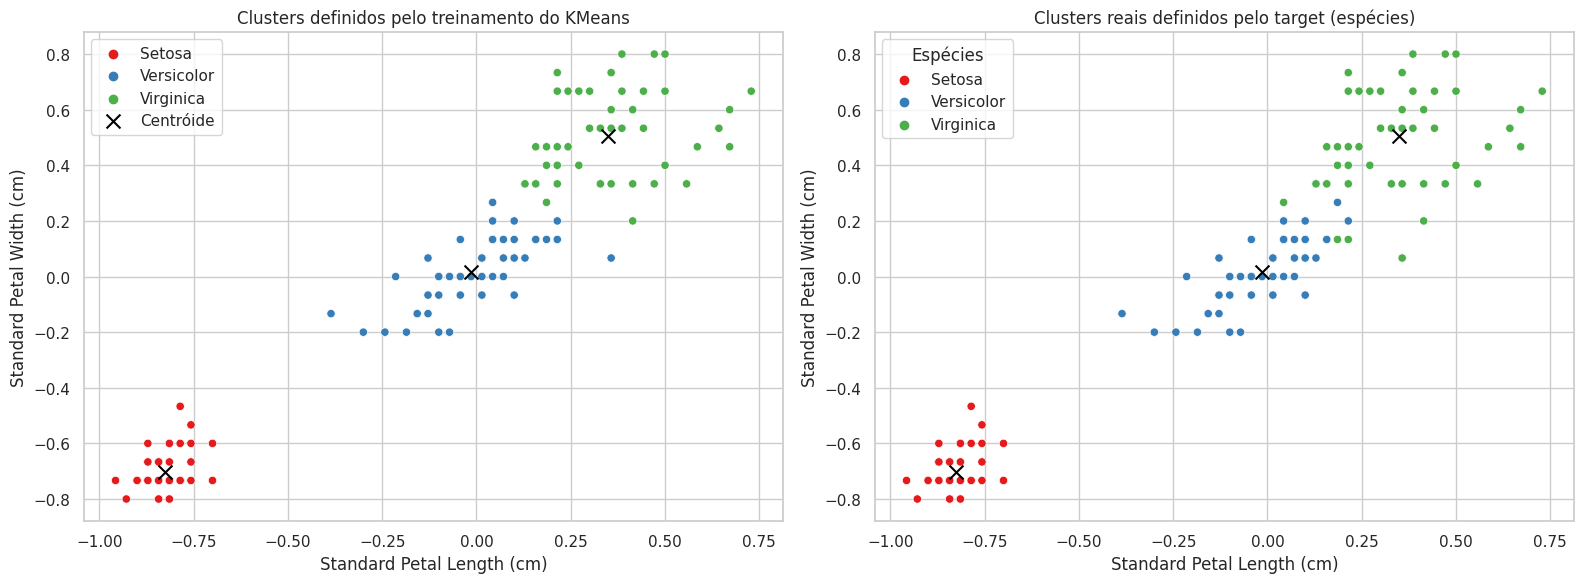

In [ ]:
cluster_mapping = {0: "Virginica", 1: "Setosa", 2: "Versicolor"}

cluster_labels = kmeans_models[2].labels_
cluster_centers = kmeans_models[2].cluster_centers_
cluster_labels_mapped = [cluster_mapping[label] for label in cluster_labels]

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

sns.scatterplot(x=petals_std['petal length (cm)'], y=petals_std['petal width (cm)'], hue=cluster_labels_mapped, palette='Set1', ax=axes[0])
axes[0].scatter(cluster_centers[:, 0], cluster_centers[:, 1], c='black', marker='x', s=100, label='Centróide')
axes[0].set_xlabel('Standard Petal Length (cm)')
axes[0].set_ylabel('Standard Petal Width (cm)')
axes[0].set_title('Clusters definidos pelo treinamento do KMeans')
axes[0].legend(loc='upper left')

sns.scatterplot(data=iristarget_std, x=iristarget_std['petal_length'], y=iristarget_std['petal_width'], hue=iristarget_std['Espécies'], palette='Set1', ax=axes[1])
axes[1].legend(title='Espécies', loc='upper left')
for i, center in enumerate(kmeans_models[2].cluster_centers_):
    axes[1].scatter(center[0], center[1], c='black', marker='x', s=100, label=f'Centro do Cluster {i}')

axes[1].set_xlabel('Standard Petal Length (cm)')
axes[1].set_ylabel('Standard Petal Width (cm)')
axes[1].set_title('Clusters reais definidos pelo target (espécies)')

plt.tight_layout()
plt.show()

Alguns dados obtidos pelo nosso modelo foram agrupados de forma errada, como pode ser observado no grupo das versicolor (azul). Alguns pontos deste grupo na verdade eram para ter sido agrupados como virginica, e não como versicolor. Já que existe um overlap dos dois grupos pois ambos os tipos de íris tem características parecidas como já havia sido dito anteriormente, o modelo apresentou dificuldade em distinguir um grupo do outro.

## **Clustering Hierárquico**

### Dendrograma

In [ ]:
model_single = AgglomerativeClustering(distance_threshold=0, n_clusters=None, linkage='single' )
model_single = model_single.fit(X)

model_complete = AgglomerativeClustering(distance_threshold=0, n_clusters=None, linkage='complete')
model_complete = model_complete.fit(X)

In [ ]:
def plot_dendrogram(model, **kwargs):
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)

    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_, counts]).astype(float)
    dendrogram(linkage_matrix, **kwargs)

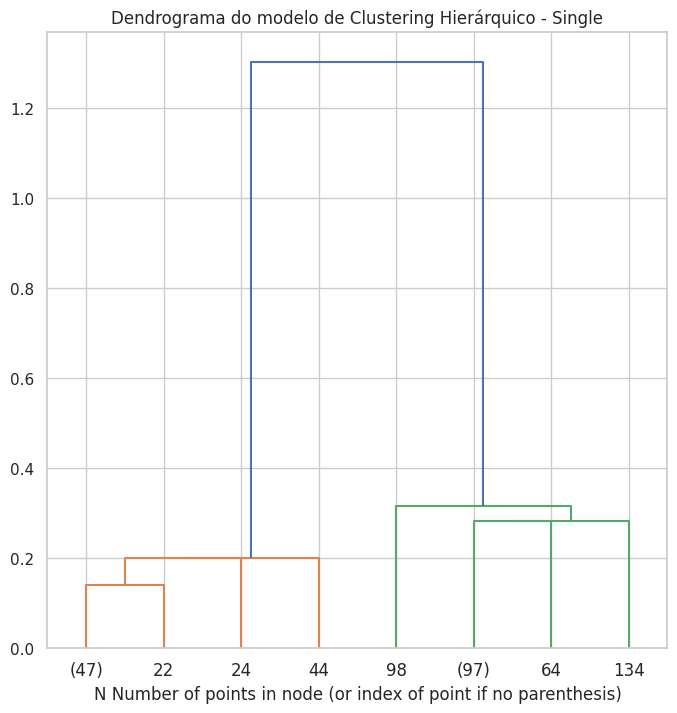

In [ ]:
plt.figure(figsize=(8, 8))
plt.title('Dendrograma do modelo de Clustering Hierárquico - Single')
plot_dendrogram(model_single, truncate_mode='level', p=3)
plt.xlabel("N Number of points in node (or index of point if no parenthesis)")
plt.show()

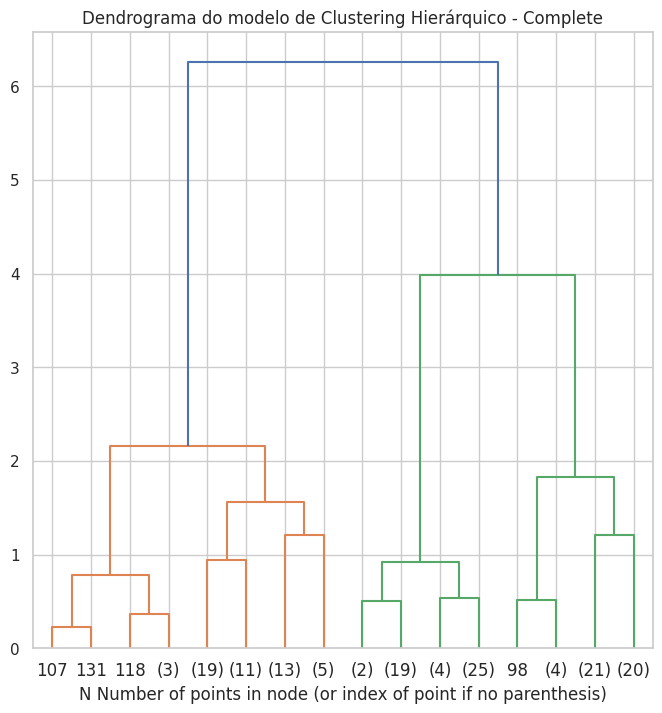

In [ ]:
plt.figure(figsize=(8, 8))
plt.title('Dendrograma do modelo de Clustering Hierárquico - Complete')
plot_dendrogram(model_complete, truncate_mode='level', p=3)
plt.xlabel("N Number of points in node (or index of point if no parenthesis)")
plt.show()

## **EXTRA - Clustering com DBScan**

Aqui, utilizaremos uma tecnica chamada DBSCAN, que se baseia  no conceito de densidade local para encontrar o melhor valor de k, tornando-o eficaz na detecção de agrupamentos de diferentes formas e tamanhos.

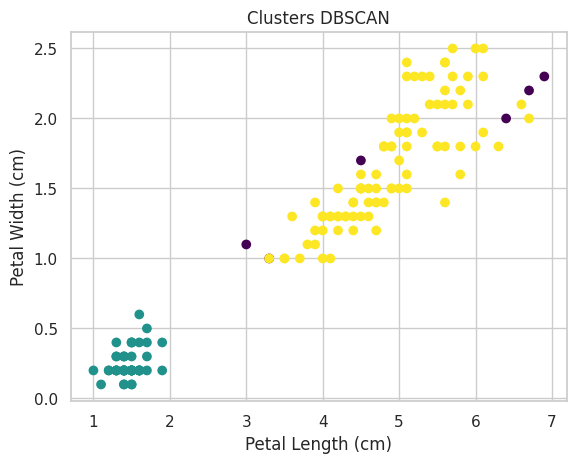

In [ ]:
dbscan = DBSCAN(eps=0.7, min_samples=8)
clusters = dbscan.fit_predict(irisdf)

plt.scatter(irisdf['petal length (cm)'], irisdf['petal width (cm)'], c=clusters, cmap='viridis')
plt.title("Clusters DBSCAN")
plt.xlabel("Petal Length (cm)")
plt.ylabel("Petal Width (cm)")
plt.show()

Utilizando o DBScan, pode ser percebido que o numero de clusters continuou sendo 3, mas com a peculiaridade de que ha apenas alguns pontos no agrupamento roxo, indicando que ele até existe, mas são poucas as íris desta espécie.